In [1]:
from platform import python_version
import sys
print(sys.executable)
print(python_version())

/opt/homebrew/anaconda3/bin/python
3.11.3


In [21]:
import pandas as pd
import numpy as np
import jqfactor_analyzer as ja
import numba
import yfinance as yf
import backtrader as bk
import akshare as ak
import os
import scipy
import matplotlib.pyplot as plt

In [3]:
os.environ.get('http_proxy')
os.environ.get('https_proxy')

In [4]:
#pip freeze > requirements.txt

In [5]:
#data
futures_hq_subscribe_exchange_symbol_df = ak.futures_hq_subscribe_exchange_symbol()
print(futures_hq_subscribe_exchange_symbol_df)


      symbol  code
0   NYBOT-棉花    CT
1    LME镍3个月   NID
2    LME铅3个月   PBD
3    LME锡3个月   SND
4    LME锌3个月   ZSD
5    LME铝3个月   AHD
6    LME铜3个月   CAD
7    CBOT-黄豆     S
8    CBOT-小麦     W
9    CBOT-玉米     C
10  CBOT-黄豆油    BO
11  CBOT-黄豆粉    SM
12      日本橡胶   TRB
13    COMEX铜    HG
14  NYMEX天然气    NG
15   NYMEX原油    CL
16   COMEX白银    SI
17   COMEX黄金    GC
18   CME-瘦肉猪   LHC
19     布伦特原油   OIL
20       伦敦金   XAU
21       伦敦银   XAG
22      伦敦铂金   XPT
23      伦敦钯金   XPD
24       马棕油  FCPO
25     欧洲碳排放   EUA


In [6]:
'''
布伦特原油   OIL         SC
NYMEX天然气    NG       PG
伦敦金   XAU            AU
伦敦银   XAG            AG
LME镍3个月   NID
2    LME铅3个月   PBD
3    LME锡3个月   SND
4    LME锌3个月   ZSD
5    LME铝3个月   AHD
6    LME铜3个月   CAD   BC
'''

'\n布伦特原油   OIL         SC\nNYMEX天然气    NG       PG\n伦敦金   XAU            AU\n伦敦银   XAG            AG\nLME镍3个月   NID\n2    LME铅3个月   PBD\n3    LME锡3个月   SND\n4    LME锌3个月   ZSD\n5    LME铝3个月   AHD\n6    LME铜3个月   CAD   BC\n'

OIL-SC0平均相差幅度: 403.75264236902046
OIL-SC0平均sigma: 124.6233598636774


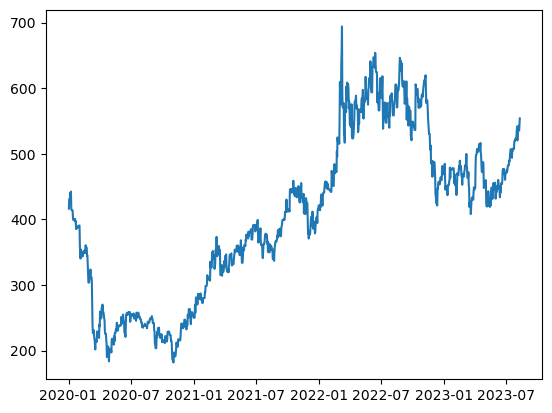

OIL-SC0 Pearson Correlation: 0.966520978935856 

CAD-CU0平均相差幅度: 54274.5106302202
CAD-CU0平均sigma: 8182.337158400837


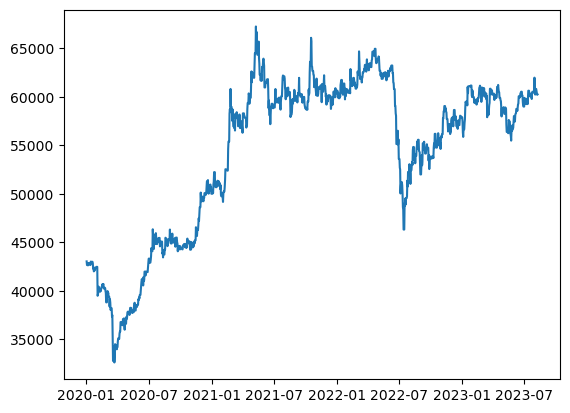

CAD-CU0 Pearson Correlation: 0.9763426582989094 

CAD-BC0平均相差幅度: 50963.420603015074
CAD-BC0平均sigma: 3554.314241041733


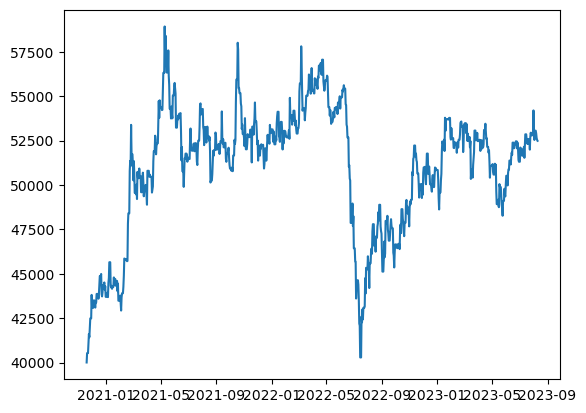

ValueError: x and y must have the same length.

In [25]:
s1 = ['OIL','NG','XAU','XAG','CAD','PBD','NID','CAD',]
s2 = ['SC0','PG0','AU0','AG0','CU0','PB0','NI0','BC0',]

start_date = '2020-01-01'
end_date = '2023-08-10'

#@numba.jit(nopython=True)
def future_arb():
    for i in range(len(s1)):
        if s1[i] not in ['OIL','CAD']:
            continue
        #corr ayasis
        futures_foreign_hist_df = ak.futures_foreign_hist(symbol=s1[i])
        futures_foreign_hist_df = futures_foreign_hist_df[(futures_foreign_hist_df.date >= start_date) & (futures_foreign_hist_df.date <= '2023-08-10')]
        date_range = pd.date_range(start=futures_foreign_hist_df["date"].min(), end=futures_foreign_hist_df["date"].max(), freq="D")  # freq="D"表示按天，可以按分钟，月，季度，年等
        futures_foreign_hist_df['date'] = pd.to_datetime(futures_foreign_hist_df['date'])
        futures_foreign_hist_df = futures_foreign_hist_df.set_index("date")
        futures_foreign_hist_df = futures_foreign_hist_df.resample("D").ffill()
        #print(futures_foreign_hist_df['close'])
        #print(futures_foreign_hist_df)
    
        #
        futures_zh_daily_sina_df = ak.futures_zh_daily_sina(symbol=s2[i])
        futures_zh_daily_sina_df = futures_zh_daily_sina_df[(futures_zh_daily_sina_df.date>=start_date) & (futures_zh_daily_sina_df.date <= '2023-08-10')]
        date_range = pd.date_range(start=futures_zh_daily_sina_df["date"].min(), end=futures_zh_daily_sina_df["date"].max(), freq="D")  # freq="D"表示按天，可以按分钟，月，季度，年等
        futures_zh_daily_sina_df['date'] = pd.to_datetime(futures_zh_daily_sina_df['date'])
        futures_zh_daily_sina_df = futures_zh_daily_sina_df.set_index("date")
        futures_zh_daily_sina_df = futures_zh_daily_sina_df.resample("D").ffill()
        
        #print(futures_zh_daily_sina_df)
        # print(s1[i])
        # print(len(futures_foreign_hist_df))
        # print(len(futures_zh_daily_sina_df))
        #print(np.array(futures_foreign_hist_df['close']))
        ## 计算Pearson相关系数

        #shift 1
        df_for = [futures_foreign_hist_df['close'][0] for i in range(1)] + futures_foreign_hist_df['close'][:-1].tolist()
        
        # pearson_corr, _ = scipy.stats.pearsonr(futures_zh_daily_sina_df['close'][10:], df_for[10:])
        # print("shifted %s-%s Pearson Correlation:" %(s1[i],s2[i]), pearson_corr)
        
        #
        differences = futures_zh_daily_sina_df['close'] - futures_foreign_hist_df['close']
        mean_difference = np.mean(differences)
        print("%s-%s平均相差幅度:"%(s1[i],s2[i]), mean_difference)
        
        sample_std = np.std(differences, ddof=1)  # 
        print("%s-%s平均sigma:"%(s1[i],s2[i]), sample_std)
        
        plt.plot(differences)
        plt.show()
        
        pearson_corr, _ = scipy.stats.pearsonr(futures_zh_daily_sina_df['close'], futures_foreign_hist_df['close'])
        print("%s-%s Pearson Correlation:" %(s1[i],s2[i]), pearson_corr,'\n')
future_arb()

In [8]:
#ak.futures_display_main_sina()[symbol=='au0']

OIL-SC0 Pearson Correlation: 0.9363947375489307 

CAD-CU0 Pearson Correlation: 0.8998826197080149 

CAD-BC0 Pearson Correlation: 0.9057872567204118 

